<a href="https://colab.research.google.com/github/strejo4/ColabFiles_UACJ_PADP/blob/main/MEIA_DatosAcademicos_Tarea.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 3)Calcule los promedios anteriores para cada estudiante y haga un análisis comparativo de los resultados.

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/ClassFiles/datos_academicos_CSV.csv', encoding='latin1').dropna(axis=1,how='all')
df.head()

# Calcular el promedio de cada estudiante para todas las asignaturas considerando los pesos de cada asignatura

vector_pesos = df['Peso'].values
matriz_calificaciones = df.iloc[:,2:].values

promedio_ponderado = np.dot(matriz_calificaciones.T, vector_pesos)/np.sum(vector_pesos)
df.loc['Promedio Ponderado', df.columns[2:]] = promedio_ponderado


# Calcular el promedio de cada estudiante para todas las asignaturas sin considerar los pesos de cada asignatura
matriz_calificaciones = df.iloc[:,2:].values
promedio_sin_pesos = np.mean(matriz_calificaciones, axis=0)
df.loc['Promedio Simple',df.columns[2:]] = promedio_sin_pesos
diferencia = promedio_ponderado - promedio_sin_pesos
df.loc['Diferencia (Ponderado - Simple)', df.columns[2:]] = diferencia
df.tail(3)

,Asignatura,Peso,202501,202502,202503,202504,202505,202506,202507,202508,202509,202510
Promedio Ponderado,NaN,NaN,6.4591,5.829100,7.384500,6.051700,5.602000,5.770100,4.697900,5.8017,7.437800,6.338900
Promedio Simple,NaN,NaN,6.2981,5.739009,7.514045,5.840155,5.598364,5.447282,4.343445,5.3047,7.097073,6.350809
Diferencia (Ponderado - Simple),NaN,NaN,0.1610,0.090091,-0.129545,0.211545,0.003636,0.322818,0.354455,0.4970,0.340727,-0.011909


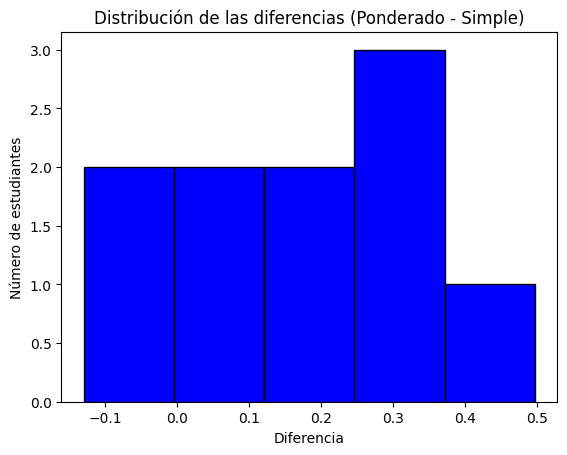

In [80]:
#Analisis comparativo

diferencia = promedio_ponderado - promedio_sin_pesos

plt.hist(diferencia, bins=5, color='blue', edgecolor='black')
plt.title('Distribución de las diferencias (Ponderado - Simple)')
plt.xlabel('Diferencia')
plt.ylabel('Número de estudiantes')
plt.show()

In [81]:
ids = df.columns[2:]  # matrículas

resultado = pd.DataFrame({
    "Estudiante": ids,
    "Ponderado": np.round(promedio_ponderado, 2),
    "Simple": np.round(promedio_sin_pesos, 2),
    "Diferencia": np.round(diferencia, 2)
})

# Clasificación con np.where anidado
resultado["Analisis"] = np.where(
    abs(resultado["Diferencia"]) <= 0, "Sin cambios",
    np.where(resultado["Diferencia"] > 0, "Favorecido", "Perjudicado")
)

resultado

,Estudiante,Ponderado,Simple,Diferencia,Analisis
0,202501,6.46,6.30,0.16,Favorecido
1,202502,5.83,5.74,0.09,Favorecido
2,202503,7.38,7.51,-0.13,Perjudicado
3,202504,6.05,5.84,0.21,Favorecido
4,202505,5.60,5.60,0.00,Sin cambios
5,202506,5.77,5.45,0.32,Favorecido
6,202507,4.70,4.34,0.35,Favorecido
7,202508,5.80,5.30,0.50,Favorecido
8,202509,7.44,7.10,0.34,Favorecido
9,202510,6.34,6.35,-0.01,Perjudicado


## Análisis comparativo de los resultados.

* El promedio ponderado toma en cuenta materias que pesan más que otras.
* El promedio simple trata a todas las materias por igual.

1. Comparacion:
  * Si el promedio ponderado es mayor que el simple, al estudiante le fue bien en las materias mas importantes (mayor peso).
  * Si el promedio ponderado es menor que el simple, al estudiante le fue mal en las materias mas importantes (mayor peso).
  * En pocas palabras, si la barra de diferencia es:
    * mayor a 0 el estudiates fue favorecido. (7 estudiante)
    * menor a 0 el estudiante fue perjudicado. (2 estudiantes)
    * Cerca de 0 el estudiante no tuvo cambios. (1 estudiantes)